In [90]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "8"
os.environ["NUM_THREADS"] = "8"
os.environ["OMP_NUM_THREADS"] = "8"
from keras.layers import Input, Dense, Flatten, Reshape
from sklearn.feature_extraction import image as sk_image
from concurrent.futures import ProcessPoolExecutor
import cartopy.feature as cfeature
from keras.models import Model
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
from sklearn.cluster import AgglomerativeClustering
from scipy.signal import convolve2d 
from scipy import ndimage
from sklearn.cluster import KMeans
import numpy as np
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
import tensorflow as tf
from tensorflow import keras    
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.cluster import DBSCAN
from pyhdf.SD import SD, SDC
import matplotlib as mpl
#tf.config.threading.set_inter_op_parallelism_threads(1)
from extract_training_data import *
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from pyhdf.error import HDF4Error
from functions import *
from tensorflow.keras.models import load_model
from sklearn.cluster import KMeans, MiniBatchKMeans
import joblib
import plot_functions
import importlib 
importlib.reload(plot_functions)
from plot_functions import *
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping


# Visualize the result
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,"  , len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


#bands = [6, 7, 20, 28, 28, 31]
bands=[29]
#bands=[1]
max_vals = np.load("/uio/hume/student-u37/fslippe/data/models/patch_size128/max_val_dnb_l95_z50_ps128_band29_2018-2023.npy")
min_vals = np.load("/uio/hume/student-u37/fslippe/data/models/patch_size128/min_val_dnb_l95_z50_ps128_band29_2018-2023.npy")

1 Physical GPUs, 1 Logical GPUs


In [91]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,"  , len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

import socket
hostname = socket.gethostname()
if "nird" in hostname:
    tf.config.threading.set_inter_op_parallelism_threads(8)
    data_loc = "/nird/projects/NS9600K/fslippe/data/"
    folder = "/nird/projects/NS9600K/data/modis/cao/MOD02/2020/ /nird/projects/NS9600K/data/modis/cao/MOD02/2021/ /nird/projects/NS9600K/data/modis/cao/MOD02/2023/"
if "mimi" in hostname:
    data_loc = "/uio/hume/student-u37/fslippe/data/"
    folder = "/scratch/fslippe/modis/MOD02/daytime_1km/ /scratch/fslippe/modis/MOD02/boundary_1km/ /scratch/fslippe/modis/MOD02/night_1km/ /scratch/fslippe/modis/MOD02/may-nov_2021/ /scratch/fslippe/modis/MOD02/cao_test_data/"


bands=[29]
from autoencoder import SobelFilterLayer, SimpleAutoencoder
print(len(bands))

#encoder = load_model("/uio/hume/student-u37/fslippe/data/models/winter_2020_21_band(6,20,29)_encoder")
max_vals = np.load("/uio/hume/student-u37/fslippe/data/models/patch_size128/max_val_dnb_l95_z50_ps128_band29_2018-2023.npy")
min_vals = np.load("/uio/hume/student-u37/fslippe/data/models/patch_size128/min_val_dnb_l95_z50_ps128_band29_2018-2023.npy")


1 Physical GPUs, 1 Logical GPUs
1


In [92]:
from calculate_scores import *
x, dates, masks, lon_lats, mod_min = extract_1km_data("/uio/hume/student-u37/fslippe/data/MOD02_cao_examples/",
                                                    bands=bands,
                                                    date_list=["2023062"],
                                                    return_lon_lat=True,
                                                    data_loc=data_loc,
                                                    data_type="npy",
                                                    combine_pics=True)
                                                    
dates, times, x_cao, masks_cao, lon_lats_cao = [dates[4]], [mod_min[4]], [x[4]], [masks[4]], [lon_lats[4]]

['/uio/hume/student-u37/fslippe/data/MOD02_cao_examples/']
2023063   5
2023063   10
2023063   150
2023063   330
2023063   505
2023063   510
2023063   645
2023063   825
2023063   830
2023063   835
2023063   1005
2023063   1010
2023063   1140
2023063   1145
2023063   1150
2023063   1320
2023063   1325
2023063   1330
2023063   1455
2023063   1500
2023063   1505
2023063   1630
2023063   1635
2023063   1640
2023063   1810
2023063   1815
2023063   1820
2023063   1950
2023063   1955
2023063   2125
2023063   2130
2023063   2135
2023063   2305
2023063   2315
2023062   105
2023062   110
2023062   425
2023062   605
2023062   610
2023062   745
2023062   750
2023062   920
2023062   925
2023062   930
2023062   1100
2023062   1105
2023062   1110
2023062   1240
2023062   1245
2023062   1250
2023062   1415
2023062   1420
2023062   1425
2023062   1555
2023062   1600
2023062   1730
2023062   1735
2023062   1905
2023062   1910
2023062   1915
2023062   2045
2023062   2050
2023062   2055
2023062   2225
2023

100%|██████████| 1/1 [00:34<00:00, 34.85s/it]


12
12


In [93]:
strides = 16
patch_size = 128
autoencoder_predict = SimpleAutoencoder(len(bands), patch_size, patch_size)
patches_cao, all_lon_patches_cao, all_lat_patches_cao, starts_cao, ends_cao, shapes_cao, n_patches_tot_cao, indices_cao = generate_patches([x[:,:,0] for x in x_cao],
                                                                                                                                            masks_cao,
                                                                                                                                            lon_lats_cao,
                                                                                                                                            max_vals,
                                                                                                                                            min_vals,
                                                                                                                                            autoencoder_predict,
                                                                                                                                            strides=[1, strides, strides,1])



KeyboardInterrupt: 

In [ ]:
last_filter = 64
n_K = 12
with tf.device('/CPU:0'):   
    encoded_patches_flat_cao = load_and_predict_encoder(patch_size, last_filter, patches_cao)
labels, global_min, global_max = get_cluster_results(encoded_patches_flat_cao, patch_size, last_filter, n_K)
open_label = np.load(f"/uio/hume/student-u37/fslippe/data/models/patch_size{patch_size}/filter{last_filter}/clustering/cluster_dnb_l95_z50_ps{patch_size}_band29_filter{last_filter}_K{n_K}_opencell_label.npy")
closed_label = np.load(f"/uio/hume/student-u37/fslippe/data/models/patch_size{patch_size}/filter{last_filter}/clustering/cluster_dnb_l95_z50_ps{patch_size}_band29_filter{last_filter}_K{n_K}_closedcell_label.npy")

cluster load loc: /uio/hume/student-u37/fslippe/data/models/patch_size128/filter64/clustering/cluster_dnb_l95_z50_ps128_band29_filter64_K12.pkl


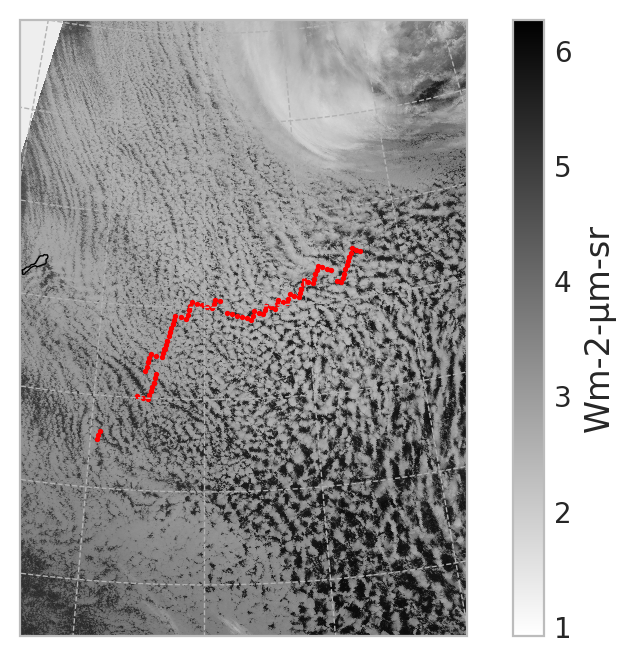

In [ ]:
size_threshold = 300
cmap_tab10 = plt.cm.tab10
cmap_tab20 = plt.cm.tab20
colors_tab20 = cmap_tab20(np.arange(cmap_tab20.N))[1::2]
colors_tab10 = cmap_tab10(np.arange(cmap_tab10.N))
extra_colors = colors_tab20
black = np.array([0, 0, 0, 1])
colors_new = np.vstack((colors_tab10, colors_tab20))[:np.max(global_max)-1]
colors_new = np.vstack((colors_new, black))

new_cmap = mcolors.ListedColormap(colors_new)
label_map, lon_map, lat_map = process_label_maps(labels,
                                                    all_lon_patches_cao,
                                                    all_lat_patches_cao,
                                                    starts_cao,                 
                                                    ends_cao,
                                                    shapes_cao,         
                                                    indices_cao,
                                                    global_max,             
                                                    n_patches_tot_cao,              
                                                    patch_size,
                                                    strides,
                                                    closed_label, 
                                                    open_label, 
                                                    size_thr_1=size_threshold, 
                                                    size_thr_2=size_threshold)
i=0
idx_cao = i
mod_min_cao = times
dates_cao = dates 

lons, lats, angles = compute_boundary_coordinates_between_labels_2(label_map[i], lon_map[i], lat_map[i], open_label, closed_label, max_distance_to_avg=None, size_threshold_1=30, size_threshold_2=30)
#lons, lats, angles = compute_normals_for_boundaries(map[i], lon_map[i], lat_map[i], label_1, label_2, size_threshold_1=400, size_threshold_2=1000)
lons_full = lons
lats_full = lats

valid_lons = []
valid_lats = []

angle_threshold = 90

for lon, lat, angle in zip(lons_full, lats_full, angles):
    wind_dir = find_wind_dir_at_ll_time(lon, lat, 950, dates_cao[idx_cao], mod_min_cao[idx_cao]) 
    
    check =check_angle_threshold(wind_dir, lons, lats, lon, lat, 10, min_distance=0, step_distance=200)
    #lons, lats = check_angle_threshold_downwind(wind_dir, lons, lats, lon, lat, 5, min_distance=100000)
    if not check:
        if np.min([abs(angle - wind_dir), abs(angle - wind_dir - 360), abs(angle - wind_dir + 360)]) < angle_threshold:
            valid_lons.append(lon)# if angle==237.43814048068378 else 0)
            valid_lats.append(lat)# if angle==237.43814048068378 else 70)

datetime_obj = datetime.datetime.strptime("%s%s" %("%s" %dates_cao[idx_cao], mod_min_cao[idx_cao]), "%Y%j%H%M")
formatted_date = datetime_obj.strftime("%Y%m%d")
ax = plot_map_with_nearest_neighbors(x_cao[idx_cao][:,:,0], valid_lons, valid_lats, lon_lats_cao[idx_cao][0], lon_lats_cao[idx_cao][1], [-7, 10, 65, 75], figsize=(6, 4))
# plt.quiver(valid_lons, valid_lats, valid_angles, 300)
plt.show()


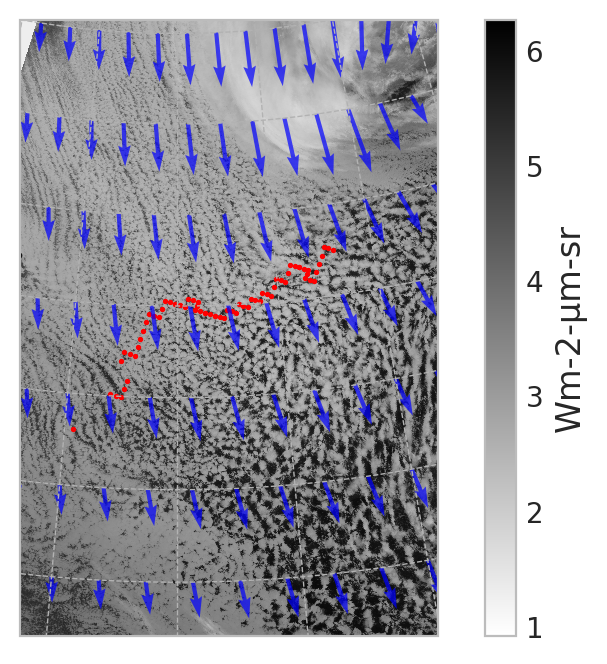

In [ ]:
ax = plot_map_with_nearest_neighbors(x_cao[idx_cao][:,:,0], valid_lons, valid_lats, lon_lats_cao[idx_cao][0], lon_lats_cao[idx_cao][1], [-6, 10, 65, 75], figsize=(6, 4))
datetime_obj = datetime.datetime.strptime("%s%s" %("%s" %dates_cao[0], times[0]), "%Y%j%H%M")

ds_wind = xr.open_dataset("/uio/hume/student-u37/fslippe/MERRA/2023/MERRA2.wind_at_950hpa.20230303.SUB.nc").sel(time=datetime_obj, lev=900, method="nearest")
u = ds_wind['U']
v = ds_wind['V']
lon = ds_wind['lon']
lat = ds_wind['lat']

ax.quiver(lon[::3], lat[::3], u.values[::3,::3], v.values[::3,::3], transform=ccrs.PlateCarree(), scale=200, headwidth=3, width=0.01, color="blue", alpha=0.7)
plt.show()


In [118]:
cao_threshold = 30
patch_threshold = 0
dict_list = np.load(f"/uio/hume/student-u37/fslippe/data/model_pred_info/filter64/dict_filter64_nK12_caothr{cao_threshold}_sizethr_{patch_threshold}_stride16.npy", allow_pickle=True)
dict_list = dict_list[112]



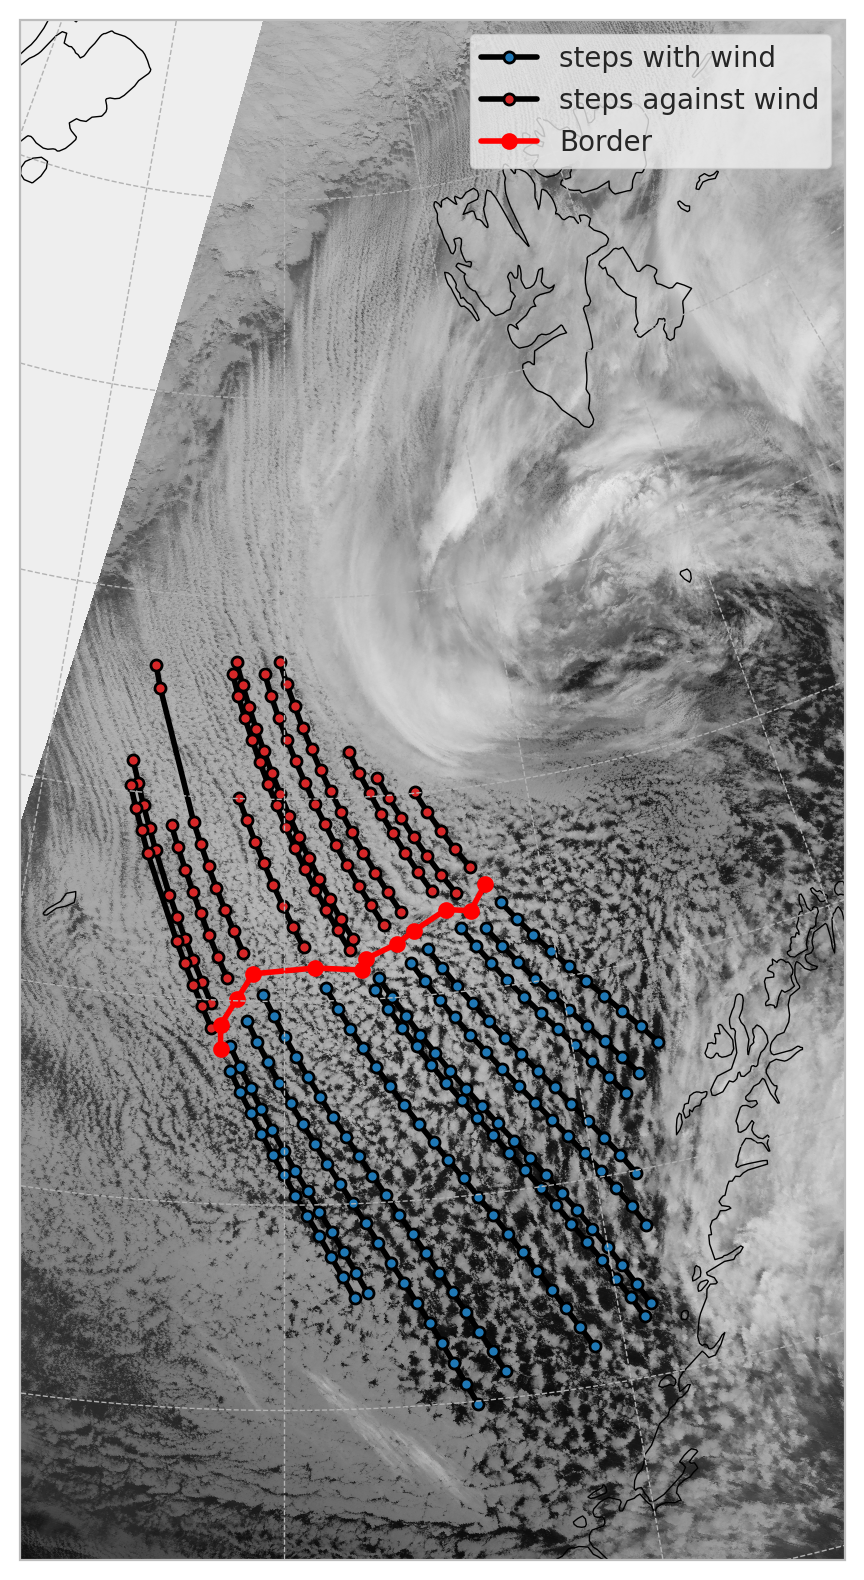

In [207]:
figsize = [10,10]
extent = [-7,15, 63, 82]
geodesic = pyproj.Geod(ellps='WGS84')
merra_folder = "/uio/hume/student-u37/fslippe/MERRA/"
lon_merra = xr.open_dataset(f"{merra_folder}/2020/MERRA2_400.tavg1_2d_slv_Nx.20200312.SUB.nc").lon.values
lat_merra = xr.open_dataset(f"{merra_folder}/2020/MERRA2_400.tavg1_2d_slv_Nx.20200312.SUB.nc").lat.values
lon_grid, lat_grid = np.meshgrid(lon, lat)
import functions
importlib.reload(functions)
from functions import *
wind_dir = np.degrees(np.arctan2(ds_wind['U'], ds_wind['V']))
wind_dir = (wind_dir + 360) % 360

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=figsize, dpi=200)

#ax.set_extent([-40, 40, 55, 85], crs=ccrs.PlateCarree())  # Adjust depending on your lat/lon bounds
ax.set_extent(extent, crs=ccrs.PlateCarree())  # Adjust depending on your lat/lon bounds
# Scatter plot of points
plt.colorbar(cb, label="Wm-2-µm-sr")
cb = ax.pcolormesh(lon_lats_cao[idx_cao][0], lon_lats_cao[idx_cao][1], x_cao[idx_cao][:,:,0], transform=ccrs.PlateCarree(), cmap='gray_r')

border_lons = []
border_lats = []
for k in range(12):
    lons_w_wind =  []
    lats_w_wind =  []
    lons_a_wind =  []
    lats_a_wind =  []

    new_lon, new_lat = valid_lons[k*8], valid_lats[k*8]
    border_lons.append(new_lon)
    border_lats.append(new_lat)

    for i in range(20):
        wind_direction = wind_dir.sel(lon=new_lon, lat=new_lat, method="nearest").values
        new_lon, new_lat = step_with_wind(
                    new_lon, new_lat, wind_direction, step_distance=32)

        new_lon_arr = np.ones(lon_grid.shape)*new_lon
        new_lat_arr = np.ones(lat_grid.shape)*new_lat

        _, _, distance = geodesic.inv(
                        new_lon_arr, new_lat_arr, lon_grid, lat_grid)

        min_index = np.argmin(distance)
        new_ix, new_iy = np.unravel_index(min_index, distance.shape)
        np.where((new_ix, new_iy) == np.array(dict_list["idx_open"]))
        if (new_ix, new_iy) in zip(np.array(dict_list["idx_open"][:,0]), np.array(dict_list["idx_open"][:,1])):
                
            lons_w_wind.append(new_lon)
            lats_w_wind.append(new_lat)

    new_lon, new_lat = valid_lons[k*8], valid_lats[k*8]
    for i in range(20):
        wind_direction = wind_dir.sel(lon=new_lon, lat=new_lat, method="nearest").values
        new_lon, new_lat = step_against_wind(
                    new_lon, new_lat, wind_direction, step_distance=32)

        new_iy = np.argmin(abs(lon_merra-new_lon))
        new_ix = np.argmin(abs(lat_merra-new_lat))
        if (new_ix, new_iy) in zip(np.array(dict_list["idx_closed"][:,0]), np.array(dict_list["idx_closed"][:,1])):
            lons_a_wind.append(new_lon)
            lats_a_wind.append(new_lat)


    if k == 11:
        ax.plot(lons_w_wind, lats_w_wind, "k-", marker="o", markerfacecolor='tab:blue', markersize=4, alpha=1, transform=ccrs.PlateCarree(), zorder=2, label="steps with wind")
        ax.plot(lons_a_wind, lats_a_wind, "k-", marker="o", markerfacecolor='tab:red', markersize=4, alpha=1, transform=ccrs.PlateCarree(), zorder=2, label="steps against wind")    
    else:
        ax.plot(lons_w_wind, lats_w_wind, "k-", marker="o", markerfacecolor='tab:blue', markersize=4, alpha=1, transform=ccrs.PlateCarree(), zorder=2)
        ax.plot(lons_a_wind, lats_a_wind, "k-", marker="o", markerfacecolor='tab:red', markersize=4, alpha=1, transform=ccrs.PlateCarree(), zorder=2)    
    
        # ax.scatter(lons_w_wind, lats_w_wind, color='tab:blue', s=2, alpha=1, transform=ccrs.PlateCarree(), zorder=2)
    # ax.scatter(lons_a_wind, lats_a_wind, color='tab:red', s=2, alpha=1, transform=ccrs.PlateCarree(), zorder=2)    

lon_merra

# ax.scatter(lon_merra[dict_list["idx_closed"][:,1]], lat_merra[dict_list["idx_closed"][:,0]], color="tab:red", marker="x", s=1, transform=ccrs.PlateCarree(), zorder=1)
# ax.scatter(lon_merra[dict_list["idx_open"][:,1]], lat_merra[dict_list["idx_open"][:,0]], color="tab:blue", marker="x", s=1, transform=ccrs.PlateCarree(), zorder=1)

ax.plot(border_lons, border_lats,"-", marker="o", color='red', lw=2, markersize=5, alpha=1, transform=ccrs.PlateCarree(), zorder=2, label="Border")
#ax.scatter(border_lons, border_lats, color='red', s=20, alpha=1, transform=ccrs.PlateCarree(), zorder=2, label=)
ax.coastlines()
ax.gridlines()
ax.legend(loc="upper right")
plt.show()


In [204]:
if (1, 44) in np.zip(np.array(dict_list["idx_closed"]), axis=0):
    print("yes")

AttributeError: module 'numpy' has no attribute 'zip'

In [201]:
np.array(dict_list["idx_closed"]) #== ([18, 44])

array([[ 18,  44],
       [ 17,  76],
       [ 21,  46],
       [ 21,  55],
       [ 42,  96],
       [ 27, 107],
       [ 42, 105],
       [ 42, 114],
       [ 25,  61],
       [ 22,  46],
       [ 24,  65],
       [ 13,  74],
       [ 17,  44],
       [ 36,  57],
       [ 28,  53],
       [ 28,  80],
       [ 21,  50],
       [ 42,  82],
       [ 21,  59],
       [ 42,  91],
       [ 42, 100],
       [ 27, 111],
       [ 42, 109],
       [ 20,  81],
       [ 25,  47],
       [ 24,  60],
       [ 24,  69],
       [ 24,  78],
       [ 16,  74],
       [ 17,  48],
       [ 17,  75],
       [ 27,  79],
       [ 21,  45],
       [ 21,  54],
       [ 42,  86],
       [ 42,  95],
       [ 42, 104],
       [ 42, 113],
       [ 23,  81],
       [ 24,  46],
       [ 13,  46],
       [ 24,  55],
       [ 24,  64],
       [ 24,  82],
       [ 36,  56],
       [ 28,  52],
       [ 27,  83],
       [ 42,  81],
       [ 19,  79],
       [ 42,  90],
       [ 20,  53],
       [ 42,  99],
       [ 27,

In [156]:
min_index = np.argmin(distance)
min_index_2d = np.unravel_index(min_index, distance.shape)
min_index_2d

(22, 69)

In [128]:
lon_merra[dict_list["idx_closed"]]#, lat_merra[dict_list["idx_closed"][0]]

array([[-2.37500000e+01, -7.50000000e+00],
       [-2.43750000e+01,  1.25000000e+01],
       [-2.18750000e+01, -6.25000000e+00],
       [-2.18750000e+01, -6.25000000e-01],
       [-8.75000000e+00,  2.50000000e+01],
       [-1.81250000e+01,  3.18750000e+01],
       [-8.75000000e+00,  3.06250000e+01],
       [-8.75000000e+00,  3.62500000e+01],
       [-1.93750000e+01,  3.12500000e+00],
       [-2.12500000e+01, -6.25000000e+00],
       [-2.00000000e+01,  5.62500000e+00],
       [-2.68750000e+01,  1.12500000e+01],
       [-2.43750000e+01, -7.50000000e+00],
       [-1.25000000e+01,  6.25000000e-01],
       [-1.75000000e+01, -1.87500000e+00],
       [-1.75000000e+01,  1.50000000e+01],
       [-2.18750000e+01, -3.75000000e+00],
       [-8.75000000e+00,  1.62500000e+01],
       [-2.18750000e+01,  1.87500000e+00],
       [-8.75000000e+00,  2.18750000e+01],
       [-8.75000000e+00,  2.75000000e+01],
       [-1.81250000e+01,  3.43750000e+01],
       [-8.75000000e+00,  3.31250000e+01],
       [-2.